Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                       

<a id='item1'></a>

## 1. Download and Explore Dataset

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 

Luckily, this dataset exists for free on the web. Feel free to try to find this dataset on your own, but here is the link to the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572

For your convenience, I downloaded the files and placed it on the server, so you can simply run a `wget` command and access the data. So let's go ahead and do that.

In [ ]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

#### Load and explore the data

Next, let's load the data.

In [ ]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a quick look at the data.

In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Notice how all the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [5]:
neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.

In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a *pandas* dataframe

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.

In [8]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.

In [9]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.

In [10]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [11]:
colummn_names = ['Borough', 'Housing Prices', 'Latitude', 'Longitude'] 

In [12]:
avgtable = pd.DataFrame(columns=colummn_names)

In [13]:
avgtable = pd.DataFrame({'Borough': ['Bronx', 'Manhattan', 'Brooklyn','Queens','Staten Island'],
                   'Housing Prices': [320335, 998557, 669457, 537350, 547792],
                  'Latitude':[40.8448, 40.7831, 40.6782, 40.7282, 40.5795],
                  'Longitude':[-73.8648, -73.9712, -73.9442, -73.7949,-74.1502]},
                  index=[0,1,2,3,4])

### Making another table called Avgtable containing datas of boroghs and housing prices

In [14]:
avgtable

,Borough,Housing Prices,Latitude,Longitude
0,Bronx,320335,40.8448,-73.8648
1,Manhattan,998557,40.7831,-73.9712
2,Brooklyn,669457,40.6782,-73.9442
3,Queens,537350,40.7282,-73.7949
4,Staten Island,547792,40.5795,-74.1502


#### Use geopy library to get the latitude and longitude values of New York City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [15]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Define Foursquare Credentials and Version

In [16]:
CLIENT_ID = 'CYU43AXTHDYJM34WDPRZSNOXMXWADEDAG50QXYTN5VY1DVIE' # your Foursquare ID
CLIENT_SECRET = 'GYLQ1GGHTBZL5MBLROG4CBCDOEMT20MPKLUPA4YKEYVMMRNY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CYU43AXTHDYJM34WDPRZSNOXMXWADEDAG50QXYTN5VY1DVIE
CLIENT_SECRET:GYLQ1GGHTBZL5MBLROG4CBCDOEMT20MPKLUPA4YKEYVMMRNY


In [17]:
avgtable.loc[4, 'Borough']

'Staten Island'

In [18]:
borough_latitude = avgtable.loc[4, 'Latitude'] # neighborhood latitude value
borough_longitude = avgtable.loc[4, 'Longitude'] # neighborhood longitude value
borough_name = avgtable.loc[4, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(borough_name, 
                                                               borough_latitude, 
                                                               borough_longitude))

Latitude and longitude values of Staten Island are 40.5795, -74.1502.


First, let's create the GET request URL. Name your URL **url**.

In [19]:
LIMIT = 100
radius = 750
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    borough_latitude, 
    borough_longitude, 
    radius, 
    LIMIT)
url



'https://api.foursquare.com/v2/venues/explore?&client_id=CYU43AXTHDYJM34WDPRZSNOXMXWADEDAG50QXYTN5VY1DVIE&client_secret=GYLQ1GGHTBZL5MBLROG4CBCDOEMT20MPKLUPA4YKEYVMMRNY&v=20180605&ll=40.5795,-74.1502&radius=750&limit=100'

Send the GET request and examine the resutls

In [20]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ed2966a9fcb92001b7afad1'},
 'response': {'headerLocation': 'Staten Island',
  'headerFullLocation': 'Staten Island',
  'headerLocationGranularity': 'city',
  'totalResults': 10,
  'suggestedBounds': {'ne': {'lat': 40.58625000675001,
    'lng': -74.1413292069294},
   'sw': {'lat': 40.57274999325, 'lng': -74.1590707930706}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ac0a2b8f964a520569420e3',
       'name': 'La Tourette Golf Course',
       'location': {'address': '1001 Richmond Hill Rd',
        'lat': 40.57560315858914,
        'lng': -74.14748744732294,
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.57560315858914,
          'lng': -74.14748744732294},
         {'label': 'entrance', 'lat': 40.57603, 'lng':

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,La Tourette Golf Course,Golf Course,40.575603,-74.147487
1,La Tourette Golf Course,Golf Course,40.576122,-74.146822
2,CVS pharmacy,Pharmacy,40.581150,-74.156524
3,Latourette Trail B,Trail,40.583638,-74.151519
4,Bowling,Bowling Alley,40.583876,-74.149626


And how many venues were returned by Foursquare?

In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

10 venues were returned by Foursquare.


In [24]:
columnn_names = ['Borough','No. of Venues'] 

### Making a Table Venuetable for storing the info about no. of venues from each borough

In [25]:
venuetable = pd.DataFrame(columns=columnn_names)

In [26]:
venuetable = pd.DataFrame({'Borough': ['Bronx', 'Manhattan', 'Brooklyn','Queens','Staten Island'],
                   'No. of Venues': [39, 100, 100, 63, 10]},
                  index=[0,1,2,3,4])

In [27]:
venuetable

,Borough,No. of Venues
0,Bronx,39
1,Manhattan,100
2,Brooklyn,100
3,Queens,63
4,Staten Island,10


### Plotting a bar graph depicting the above table

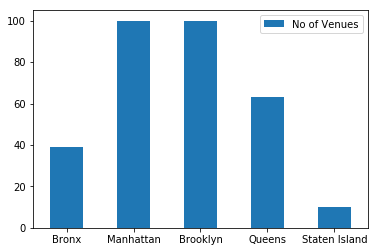

In [63]:
novenues = [39, 100, 100, 63, 10]
index = ['Bronx', 'Manhattan', 'Brooklyn',
         'Queens','Staten Island']
dff = pd.DataFrame({'No of Venues': novenues}, index=index)
ax = dff.plot.bar(rot=0)

<a id='item2'></a>

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Boro Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *manhattan_venues*.

In [64]:


manhattan_venues = getNearbyVenues(names=avgtable['Borough'],
                                   latitudes=avgtable['Latitude'],
                                   longitudes=avgtable['Longitude']
                                  )



Bronx
Manhattan
Brooklyn
Queens
Staten Island


#### Let's check the size of the resulting dataframe

In [31]:
print(manhattan_venues.shape)
manhattan_venues.head()

(220, 7)


,Borough,Borough Latitude,Boro Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bronx,40.8448,-73.8648,Conti's Pastry Shoppe,40.845906,-73.862836,Coffee Shop
1,Bronx,40.8448,-73.8648,New Morris Deli,40.846529,-73.863874,Deli / Bodega
2,Bronx,40.8448,-73.8648,Morris Park Pizza,40.844962,-73.867606,Pizza Place
3,Bronx,40.8448,-73.8648,Primavera Pizzeria & Restaurant,40.845761,-73.863848,Pizza Place
4,Bronx,40.8448,-73.8648,Arth Aljanathain,40.847338,-73.866632,Middle Eastern Restaurant


In [32]:
manhattan_venues.groupby('Borough').count()

,Borough Latitude,Boro Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Bronx,34,34,34,34,34,34
Brooklyn,50,50,50,50,50,50
Manhattan,98,98,98,98,98,98
Queens,34,34,34,34,34,34
Staten Island,4,4,4,4,4,4


#### Let's find out how many unique categories can be curated from all the returned venues

In [33]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 101 uniques categories.


<a id='item3'></a>

In [34]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Borough'] = manhattan_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Borough,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Court,Board Shop,Bookstore,Bowling Alley,Breakfast Spot,Bridge,Burger Joint,Bus Station,Café,Caribbean Restaurant,Castle,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,College Basketball Court,College Gym,Convenience Store,Creperie,Deli / Bodega,Department Store,Dessert Shop,Dog Run,Donut Shop,Exhibit,Farmers Market,Fast Food Restaurant,Film Studio,Flower Shop,Food Truck,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Historic Site,History Museum,Home Service,Hookah Bar,Ice Cream Shop,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Kids Store,Korean Restaurant,Lake,Liquor Store,Market,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Museum,Music Venue,Nightclub,Outdoor Sculpture,Park,Pizza Place,Planetarium,Playground,Plaza,Public Art,Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Supermarket,Sushi Restaurant,Taco Place,Theater,Trail,Vegetarian / Vegan Restaurant,Video Store,Weight Loss Center,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Bronx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bronx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bronx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bronx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bronx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [35]:
manhattan_onehot.shape

(220, 102)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [36]:
manhattan_grouped = manhattan_onehot.groupby('Borough').mean().reset_index()
manhattan_grouped

,Borough,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Court,Board Shop,Bookstore,Bowling Alley,Breakfast Spot,Bridge,Burger Joint,Bus Station,Café,Caribbean Restaurant,Castle,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,College Basketball Court,College Gym,Convenience Store,Creperie,Deli / Bodega,Department Store,Dessert Shop,Dog Run,Donut Shop,Exhibit,Farmers Market,Fast Food Restaurant,Film Studio,Flower Shop,Food Truck,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Historic Site,History Museum,Home Service,Hookah Bar,Ice Cream Shop,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Kids Store,Korean Restaurant,Lake,Liquor Store,Market,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Museum,Music Venue,Nightclub,Outdoor Sculpture,Park,Pizza Place,Planetarium,Playground,Plaza,Public Art,Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Supermarket,Sushi Restaurant,Taco Place,Theater,Trail,Vegetarian / Vegan Restaurant,Video Store,Weight Loss Center,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Bronx,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.00,0.000000,0.000000,0.00,0.088235,0.000000,0.00,0.000000,0.00,0.029412,0.000000,0.029412,0.000000,0.029412,0.00,0.000000,0.147059,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.00,0.029412,0.000000,0.000000,0.00,0.029412,0.000000,0.00,0.000000,0.0,0.029412,0.000000,0.000000,0.000000,0.000000,0.029412,0.029412,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.147059,0.000000,0.029412,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.058824,0.00,0.000000,0.029412,0.000000,0.00,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000
1,Brooklyn,0.020000,0.000000,0.000000,0.020000,0.040000,0.040000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.02,0.000000,0.040000,0.04,0.000000,0.04,0.000000,0.000000,0.080000,0.000000,0.000000,0.04,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.02,0.000000,0.0,0.040000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.02,0.000000,0.000000,0.020000,0.000000,0.040000,0.020000,0.000000,0.020000,0.060000,0.000000,0.000000,0.000000,0.04,0.000000,0.06,0.000000,0.000000,0.000000,0.02,0.000000,0.020000,0.000000,0.02,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Manhattan,0.010204,0.000000,0.000000,0.010204,0.000000,0.010204,0.010204,0.000000,0.000000,0.010204,0.00,0.010204,0.010204,0.00,0.000000,0.010204,0.00,0.010204,0.00,0.000000,0.010204,0.030612,0.000000,0.000000,0.00,0.010204,0.000000,0.000000,0.020408,0.010204,0.000000,0.142857,0.010204,0.00,0.000000,0.010204,0.020408,0.00,0.000000,0.030612,0.00,0.010204,0.0,0.010204,0.010204,0.010204,0.010204,0.061224,0.000000,0.000000,0.000000,0.010204,0.010204,0.020408,0.000000,0.010204,0.000000,0.010204,0.00,0.000000,0.000000,0.010204,0.010204,0.000000,0.000000,0.010204,0.010204,0.010204,0.00,0.010204,0.071429,0.010204,0.030612,0.051020,0.010204,0.010204,0.010204,0.000000,0.010204,0.010204,0.010204,0.00,0.000000,0.00,0.010204,0.000000,0.000000,0.00,0.010204,0.000000,0.020408,0.00,0.030612,0.010204,0.010204,0.000000,0.000000,0.020408,0.010204,0.010204,0.020408
3,Queens,0.000000,0.029412,0.000000,0.02

#### Let's confirm the new size

In [37]:
manhattan_grouped.shape

(5, 102)

#### Let's print each neighborhood along with the top 5 most common venues

In [38]:
num_top_venues = 5

for hood in manhattan_grouped['Borough']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bronx----
                venue  freq
0       Deli / Bodega  0.15
1         Pizza Place  0.15
2         Bus Station  0.09
3          Restaurant  0.06
4  Italian Restaurant  0.06


----Brooklyn----
                             venue  freq
0                      Coffee Shop  0.08
1  Southern / Soul Food Restaurant  0.06
2                   Sandwich Place  0.06
3                    Deli / Bodega  0.06
4                Convenience Store  0.04


----Manhattan----
            venue  freq
0         Exhibit  0.14
1            Park  0.07
2  History Museum  0.06
3      Playground  0.05
4          Garden  0.03


----Queens----
                 venue  freq
0          Pizza Place  0.06
1  Japanese Restaurant  0.06
2       Sandwich Place  0.06
3          Bus Station  0.06
4       Ice Cream Shop  0.03


----Staten Island----
                 venue  freq
0          Golf Course  0.50
1                Trail  0.25
2        Bowling Alley  0.25
3  American Restaurant  0.00
4    Mobile Phone Shop  0.00


In [39]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [41]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = manhattan_grouped['Borough']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Deli / Bodega,Pizza Place,Bus Station,Italian Restaurant,Restaurant,Spanish Restaurant,Playground,Home Service,Hookah Bar,Furniture / Home Store
1,Brooklyn,Coffee Shop,Sandwich Place,Deli / Bodega,Southern / Soul Food Restaurant,Café,Playground,Seafood Restaurant,Chinese Restaurant,Caribbean Restaurant,Convenience Store
2,Manhattan,Exhibit,Park,History Museum,Playground,Theater,Coffee Shop,Planetarium,Garden,Sushi Restaurant,Italian Restaurant
3,Queens,Pizza Place,Bus Station,Japanese Restaurant,Sandwich Place,Middle Eastern Restaurant,Clothing Store,Playground,Coffee Shop,Park,College Basketball Court
4,Staten Island,Golf Course,Trail,Bowling Alley,Yoga Studio,Food Truck,Department Store,Dessert Shop,Dog Run,Donut Shop,Exhibit


## Merging tables to get a new table for better analysis

In [43]:
manhattan_merged = avgtable


manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')

manhattan_merged.head()

,Borough,Housing Prices,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,320335,40.8448,-73.8648,Deli / Bodega,Pizza Place,Bus Station,Italian Restaurant,Restaurant,Spanish Restaurant,Playground,Home Service,Hookah Bar,Furniture / Home Store
1,Manhattan,998557,40.7831,-73.9712,Exhibit,Park,History Museum,Playground,Theater,Coffee Shop,Planetarium,Garden,Sushi Restaurant,Italian Restaurant
2,Brooklyn,669457,40.6782,-73.9442,Coffee Shop,Sandwich Place,Deli / Bodega,Southern / Soul Food Restaurant,Café,Playground,Seafood Restaurant,Chinese Restaurant,Caribbean Restaurant,Convenience Store
3,Queens,537350,40.7282,-73.7949,Pizza Place,Bus Station,Japanese Restaurant,Sandwich Place,Middle Eastern Restaurant,Clothing Store,Playground,Coffee Shop,Park,College Basketball Court
4,Staten Island,547792,40.5795,-74.1502,Golf Course,Trail,Bowling Alley,Yoga Studio,Food Truck,Department Store,Dessert Shop,Dog Run,Donut Shop,Exhibit


In [44]:
PriceLevel = ['Low', 'High', 'Mid', 'Mid','Mid'] 
manhattan_merged['Price Level'] = PriceLevel

In [45]:
PriceLevelNum = [0,2,1,1,1]
manhattan_merged['Price Level Num']=PriceLevelNum

In [46]:
manhattan_merged

,Borough,Housing Prices,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price Level,Price Level Num
0,Bronx,320335,40.8448,-73.8648,Deli / Bodega,Pizza Place,Bus Station,Italian Restaurant,Restaurant,Spanish Restaurant,Playground,Home Service,Hookah Bar,Furniture / Home Store,Low,0
1,Manhattan,998557,40.7831,-73.9712,Exhibit,Park,History Museum,Playground,Theater,Coffee Shop,Planetarium,Garden,Sushi Restaurant,Italian Restaurant,High,2
2,Brooklyn,669457,40.6782,-73.9442,Coffee Shop,Sandwich Place,Deli / Bodega,Southern / Soul Food Restaurant,Café,Playground,Seafood Restaurant,Chinese Restaurant,Caribbean Restaurant,Convenience Store,Mid,1
3,Queens,537350,40.7282,-73.7949,Pizza Place,Bus Station,Japanese Restaurant,Sandwich Place,Middle Eastern Restaurant,Clothing Store,Playground,Coffee Shop,Park,College Basketball Court,Mid,1
4,Staten Island,547792,40.5795,-74.1502,Golf Course,Trail,Bowling Alley,Yoga Studio,Food Truck,Department Store,Dessert Shop,Dog Run,Donut Shop,Exhibit,Mid,1


### Plotting the Price Level vs Housing Price

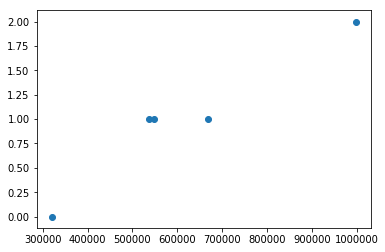

In [47]:
plt.scatter(manhattan_merged['Housing Prices'],manhattan_merged['Price Level Num'])

### Clustering the Boroughs

In [48]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
y_predicted=km.fit_predict(manhattan_merged[['Housing Prices','Price Level Num']])
y_predicted

array([2, 1, 0, 0, 0], dtype=int32)

In [50]:
cluster = [0,2,1,1,1]
manhattan_merged['cluster']=PriceLevelNum

In [51]:
manhattan_merged

,Borough,Housing Prices,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price Level,Price Level Num,cluster
0,Bronx,320335,40.8448,-73.8648,Deli / Bodega,Pizza Place,Bus Station,Italian Restaurant,Restaurant,Spanish Restaurant,Playground,Home Service,Hookah Bar,Furniture / Home Store,Low,0,0
1,Manhattan,998557,40.7831,-73.9712,Exhibit,Park,History Museum,Playground,Theater,Coffee Shop,Planetarium,Garden,Sushi Restaurant,Italian Restaurant,High,2,2
2,Brooklyn,669457,40.6782,-73.9442,Coffee Shop,Sandwich Place,Deli / Bodega,Southern / Soul Food Restaurant,Café,Playground,Seafood Restaurant,Chinese Restaurant,Caribbean Restaurant,Convenience Store,Mid,1,1
3,Queens,537350,40.7282,-73.7949,Pizza Place,Bus Station,Japanese Restaurant,Sandwich Place,Middle Eastern Restaurant,Clothing Store,Playground,Coffee Shop,Park,College Basketball Court,Mid,1,1
4,Staten Island,547792,40.5795,-74.1502,Golf Course,Trail,Bowling Alley,Yoga Studio,Food Truck,Department Store,Dessert Shop,Dog Run,Donut Shop,Exhibit,Mid,1,1


In [52]:
kclusters=3

### Plotting the three cluster types with housing price and Price Level data

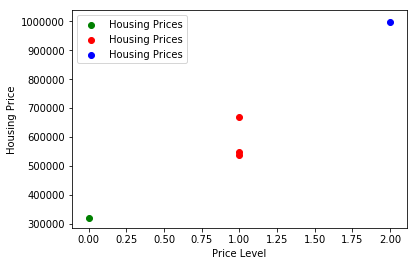

In [53]:
df1 = manhattan_merged[manhattan_merged.cluster==0]
df2 = manhattan_merged[manhattan_merged.cluster==1]
df3 = manhattan_merged[manhattan_merged.cluster==2]
plt.scatter(df1['Price Level Num'],df1['Housing Prices'],color='green')
plt.scatter(df2['Price Level Num'],df2['Housing Prices'],color='red')
plt.scatter(df3['Price Level Num'],df3['Housing Prices'],color='blue')
plt.xlabel('Price Level')
plt.ylabel('Housing Price')
plt.legend()

In [54]:
 manhattan_merged['Top Venues']= manhattan_merged['1st Most Common Venue'].map(str) + manhattan_merged['2nd Most Common Venue'].map(str) + manhattan_merged['3rd Most Common Venue'].map(str) 

In [55]:
manhattan_merged

,Borough,Housing Prices,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price Level,Price Level Num,cluster,Top Venues
0,Bronx,320335,40.8448,-73.8648,Deli / Bodega,Pizza Place,Bus Station,Italian Restaurant,Restaurant,Spanish Restaurant,Playground,Home Service,Hookah Bar,Furniture / Home Store,Low,0,0,Deli / BodegaPizza PlaceBus Station
1,Manhattan,998557,40.7831,-73.9712,Exhibit,Park,History Museum,Playground,Theater,Coffee Shop,Planetarium,Garden,Sushi Restaurant,Italian Restaurant,High,2,2,ExhibitParkHistory Museum
2,Brooklyn,669457,40.6782,-73.9442,Coffee Shop,Sandwich Place,Deli / Bodega,Southern / Soul Food Restaurant,Café,Playground,Seafood Restaurant,Chinese Restaurant,Caribbean Restaurant,Convenience Store,Mid,1,1,Coffee ShopSandwich PlaceDeli / Bodega
3,Queens,537350,40.7282,-73.7949,Pizza Place,Bus Station,Japanese Restaurant,Sandwich Place,Middle Eastern Restaurant,Clothing Store,Playground,Coffee Shop,Park,College Basketball Court,Mid,1,1,Pizza PlaceBus StationJapanese Restaurant
4,Staten Island,547792,40.5795,-74.1502,Golf Course,Trail,Bowling Alley,Yoga Studio,Food Truck,Department Store,Dessert Shop,Dog Run,Donut Shop,Exhibit,Mid,1,1,Golf CourseTrailBowling Alley


### Plotting the price of housing prices in each borough

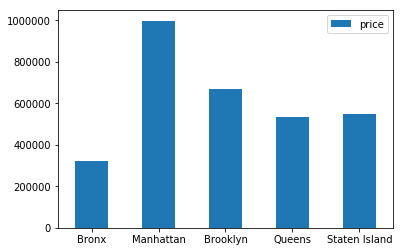

In [56]:
price = [320335, 998557, 669457, 535735, 547792]
index = ['Bronx', 'Manhattan', 'Brooklyn',
         'Queens','Staten Island']
df = pd.DataFrame({'price': price}, index=index)
ax = df.plot.bar(rot=0)

In [57]:
manhattan_new = manhattan_merged.groupby('Top Venues').mean().reset_index()

In [58]:
manhattan_new

,Top Venues,Housing Prices,Latitude,Longitude,Price Level Num,cluster
0,Coffee ShopSandwich PlaceDeli / Bodega,669457,40.6782,-73.9442,1,1
1,Deli / BodegaPizza PlaceBus Station,320335,40.8448,-73.8648,0,0
2,ExhibitParkHistory Museum,998557,40.7831,-73.9712,2,2
3,Golf CourseTrailBowling Alley,547792,40.5795,-74.1502,1,1
4,Pizza PlaceBus StationJapanese Restaurant,537350,40.7282,-73.7949,1,1


In [61]:
manhattan_merged

,Borough,Housing Prices,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price Level,Price Level Num,cluster,Top Venues
0,Bronx,320335,40.8448,-73.8648,Deli / Bodega,Pizza Place,Bus Station,Italian Restaurant,Restaurant,Spanish Restaurant,Playground,Home Service,Hookah Bar,Furniture / Home Store,Low,0,0,Deli / BodegaPizza PlaceBus Station
1,Manhattan,998557,40.7831,-73.9712,Exhibit,Park,History Museum,Playground,Theater,Coffee Shop,Planetarium,Garden,Sushi Restaurant,Italian Restaurant,High,2,2,ExhibitParkHistory Museum
2,Brooklyn,669457,40.6782,-73.9442,Coffee Shop,Sandwich Place,Deli / Bodega,Southern / Soul Food Restaurant,Café,Playground,Seafood Restaurant,Chinese Restaurant,Caribbean Restaurant,Convenience Store,Mid,1,1,Coffee ShopSandwich PlaceDeli / Bodega
3,Queens,537350,40.7282,-73.7949,Pizza Place,Bus Station,Japanese Restaurant,Sandwich Place,Middle Eastern Restaurant,Clothing Store,Playground,Coffee Shop,Park,College Basketball Court,Mid,1,1,Pizza PlaceBus StationJapanese Restaurant
4,Staten Island,547792,40.5795,-74.1502,Golf Course,Trail,Bowling Alley,Yoga Studio,Food Truck,Department Store,Dessert Shop,Dog Run,Donut Shop,Exhibit,Mid,1,1,Golf CourseTrailBowling Alley


In [107]:
print(avghspmid)

584866.3333333334


In [110]:
col_names=['Cluster','Venues','Average Housing Price']

### Making a new table with info about no. of top venues with type, cluster, and Housig Price

In [111]:
newtable = pd.DataFrame(columns=col_names)

In [113]:
newtable = pd.DataFrame({'Cluster': [0, 2, 1],
                  'Venues': [ '3Restaurents 3Food&Drinks 2PublicSpaces 2Services', '2Restaurents 9Food&Drinks 12PublicSpaces 0Services','6Restaurents 3Food&Drinks 7PublicSpaces 3Services' ],
                        'Average Housing Price':[320335, 998557,584866]},
                  index=[0,1,2])

In [114]:
newtable

,Cluster,Venues,Average Housing Price
0,0,3Restaurents 3Food&Drinks 2PublicSpaces 2Services,320335
1,2,2Restaurents 9Food&Drinks 12PublicSpaces 0Serv...,998557
2,1,6Restaurents 3Food&Drinks 7PublicSpaces 3Services,584866


### Plotting the graph showing Venues within each cluster 

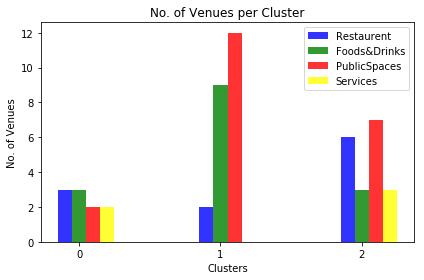

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 3
means_rest = (3, 2, 6)
means_food = (3, 9, 3)
means_pub = (2,12,7)
means_serv = (2,0,3)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, means_rest, bar_width,
alpha=opacity,
color='Blue',
label='Restaurent')

rects2 = plt.bar(index + bar_width, means_food, bar_width,
alpha=opacity,
color='Green',
label='Foods&Drinks')

rects3 = plt.bar(index + bar_width + bar_width, means_pub, bar_width,
alpha=opacity,
color='Red',
label='PublicSpaces')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, means_serv, bar_width,
alpha=opacity,
color='Yellow',
label='Services')

plt.xlabel('Clusters')
plt.ylabel('No. of Venues')
plt.title('No. of Venues per Cluster')
plt.xticks(index + bar_width, ('0', '1', '2'))
plt.legend()

plt.tight_layout()
plt.show()

In [66]:
manhattan_new

,Top Venues,Housing Prices,Latitude,Longitude,Price Level Num,cluster
0,Coffee ShopSandwich PlaceDeli / Bodega,669457,40.6782,-73.9442,1,1
1,Deli / BodegaPizza PlaceBus Station,320335,40.8448,-73.8648,0,0
2,ExhibitParkHistory Museum,998557,40.7831,-73.9712,2,2
3,Golf CourseTrailBowling Alley,547792,40.5795,-74.1502,1,1
4,Pizza PlaceBus StationJapanese Restaurant,537350,40.7282,-73.7949,1,1


### Here in the Folium Map, I've made the clusters superimposed over the boroughs
#### Red Color = Mid Level HSP
#### Violet Color = High Level HSP
#### Light Bluish Green Color = Low Level HSP

In [160]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Borough'], manhattan_merged['cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## In the above graph I've plotted the clusters with colors indicating their housing price range.
### A new client could hover to the desired the cluster symbol and fetch an housing space.

#### With that I've concluded the project. The main idea was to differentiate new york boroughs with their housing price range.